<div align = 'center'> <h1> Parameter Optimization for SVM </h1></div>

Import Required Libraries

In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import NuSVC
from sklearn.metrics import accuracy_score
import random as r
import seaborn as sns
import matplotlib.pyplot as plt

Basic Data Analysis on Data Used

In [40]:
data = pd.read_excel('Dry_Bean_Dataset.xlsx')
data
data.shape

(13611, 17)

In [41]:
data.head(10)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
5,30279,634.927,212.560556,181.510182,1.171067,0.520401,30600,196.347702,0.775688,0.989510,0.943852,0.923726,0.007020,0.003153,0.853270,0.999236,SEKER
6,30477,670.033,211.050155,184.039050,1.146768,0.489478,30970,196.988633,0.762402,0.984081,0.853080,0.933374,0.006925,0.003242,0.871186,0.999049,SEKER
7,30519,629.727,212.996755,182.737204,1.165591,0.513760,30847,197.124320,0.770682,0.989367,0.967109,0.925480,0.006979,0.003158,0.856514,0.998345,SEKER
8,30685,635.681,213.534145,183.157146,1.165852,0.514081,31044,197.659696,0.771561,0.988436,0.954240,0.925658,0.006959,0.003152,0.856844,0.998953,SEKER
9,30834,631.934,217.227813,180.897469,1.200834,0.553642,31120,198.139012,0.783683,0.990810,0.970278,0.912125,0.007045,0.003008,0.831973,0.999061,SEKER


In [42]:
data.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


scatter Plot showing the Distribution of Data based on classes on comapring roundness and compactness

<AxesSubplot: xlabel='roundness', ylabel='Compactness'>

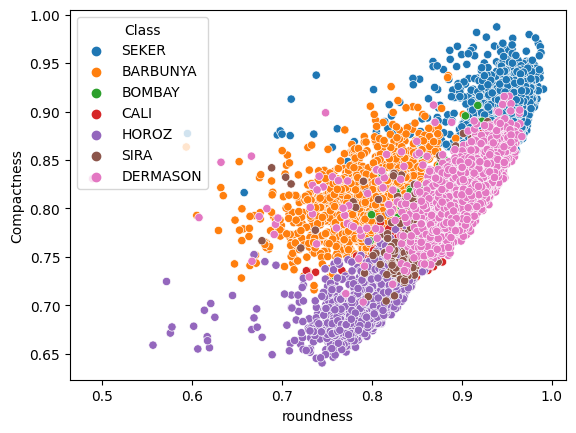

In [43]:
sns.scatterplot(x = 'roundness',y = 'Compactness',hue = 'Class',data = data)

Almost 14k records so lets draw a sample of 2k records each

In [48]:
random_samples = []
for i in range(10):
    random_samples.append(data.sample(n = 2000,replace = False))
random_samples[0].shape

(2000, 17)

Making Fitness Function that initiliazes the SVM and returns accuracy.

In [45]:
def fitnessFunc(k,n,e,data):
    X = data.drop('Class',axis = 1)
    y = data['Class']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    try:
        svm_classifier = NuSVC(kernel = k ,nu = n,tol = e,random_state = 42)
        svm_classifier.fit(X_train,y_train)
        y_pred = svm_classifier.predict(X_test)
        return accuracy_score(y_test,y_pred)
    except:
        return 0 

Running the code for 100 iterations on all 10 samples and get best Accuracy for each Sample.

In [46]:
acc_convs = []
kernellist = [ 'sigmoid', 'poly', 'rbf', 'linear']
bestEpsilons = []
bestNus = []
bestKernels = []
bestAccuracys = []
for sample in random_samples:
    bestAccuracy = 0
    bestKernel = ''
    bestNu = 0
    bestEpsilon = 0
    acc_conv = []
    for i in range(100):
        k = r.sample(kernellist,1)[0]
        n = r.uniform(0.05,0.23)
        e = r.uniform(0,1)
        accuracy = fitnessFunc(k,n,e,sample)
        acc_conv.append(accuracy)
        if accuracy > bestAccuracy:
            bestAccuracy = accuracy
            bestKernel = k
            bestNu = n
            bestEpsilon = e
    bestEpsilons.append(e)
    bestNus.append(n)
    bestKernels.append(k)
    bestAccuracys.append(bestAccuracy)
    acc_convs.append(acc_conv)
            
        
        
    

Results of the Experiment

In [ ]:
Sample = [i for i in range(1,11)]

Results = pd.DataFrame({
    'Sample_No.':Sample,
    'Best Accuracy':bestAccuracys,
    'Epsilon':bestEpsilons,
    'Nu':bestNus,
    'Kernel':bestKernels
})
print(Results)

   Sample_No.  Best Accuracy   Epsilon        Nu   Kernel
0           1       0.920000  0.947903  0.126627  sigmoid
1           2       0.916667  0.873418  0.170332  sigmoid
2           3       0.926667  0.058894  0.127191     poly
3           4       0.933333  0.200512  0.202831  sigmoid
4           5       0.910000  0.559005  0.111917  sigmoid
5           6       0.948333  0.300074  0.083273  sigmoid
6           7       0.928333  0.777512  0.139235      rbf
7           8       0.925000  0.436616  0.189995  sigmoid
8           9       0.943333  0.256725  0.085982   linear
9          10       0.908333  0.055472  0.210726      rbf


Convergence graph for Sample with Best Accuracy 

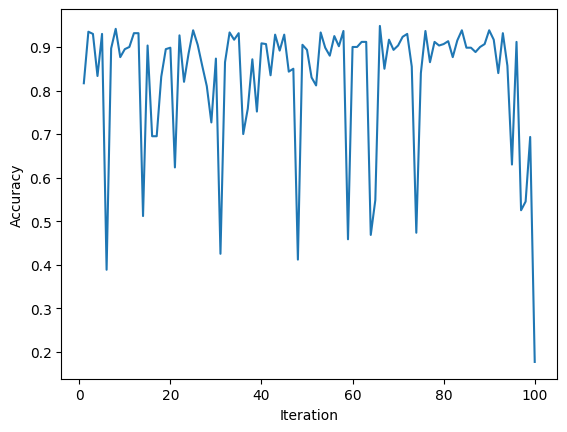

In [ ]:
max_index = bestAccuracys.index(max(bestAccuracys))
size = len(acc_convs[max_index])
iteration = [i for i in range(1,size+1)]
sns.lineplot(x = iteration,y = acc_convs[max_index])
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.show()

Accuracy drops to 0  when the random value of Nu is not feasible